In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [ ]:
X_train = pd.read_csv("/content/drive/MyDrive/Datasets/car-data/x_train.csv")
X_test = pd.read_csv("/content/drive/MyDrive/Datasets/car-data/x_test.csv")
y_train = pd.read_csv("/content/drive/MyDrive/Datasets/car-data/y_train.csv")
y_test = pd.read_csv("/content/drive/MyDrive/Datasets/car-data/y_test.csv")

In [ ]:
X_train = X_train.drop(columns = {"Unnamed: 0"})
y_train = y_train.drop(columns = {"Unnamed: 0"})
X_test = X_test.drop(columns = {"Unnamed: 0"})
y_test = y_test.drop(columns = {"Unnamed: 0"})

In [ ]:
print("X_train.shape : " , X_train.shape)
print("X_test.shape : " , X_test.shape)
print("y_train.shape : " , y_train.shape)
print("y_test.shape : " , y_test.shape)

X_train.shape :  (205, 5)
X_test.shape :  (69, 5)
y_train.shape :  (205, 1)
y_test.shape :  (69, 1)


<h4>GridSearchCV</h4>

In [ ]:
# param_grid

In [ ]:
# param_grid = {"n_estimators" : [500 , 1000 , 1500 , 2000],
#               "max_depth" : [x for x in range(1 , 6)],
#               "max_features" : ["sqrt" , "auto" , "log2"]
#               }
# rf_reg = RandomForestRegressor()
# rf_cv = GridSearchCV(estimator = rf_reg , param_grid = param_grid , scoring='neg_mean_squared_error' , n_jobs = -1 , verbose=True)
# rf_cv.fit(X_train, np.ravel(y_train))

In [ ]:
# rf_cv.best_params_

In [ ]:
rf_reg = RandomForestRegressor(n_estimators = 2000 , max_depth = 5, max_features = "auto" , random_state=1)
rf_reg.fit(X_train , np.ravel(y_train))
rfreg_test_prediction = rf_reg.predict(X_test)
print("Random Forest Mean Squared Error(MSE) On Test Set : " , round(metrics.mean_squared_error(y_test , rfreg_test_prediction) , 2))

Random Forest Mean Squared Error(MSE) On Test Set :  0.64


In [ ]:
rfreg_train_prediction = rf_reg.predict(X_train)
print("Random Forest Mean Squared Error(MSE) On Training Set : " , round(metrics.mean_squared_error(y_train , rfreg_train_prediction) , 2))

Random Forest Mean Squared Error(MSE) On Training Set :  0.23


<h3>Cross-Validation</h3>
GridSearch usually uses CV technique but it does only on training set.But CV itself uses this technique on both trainig and test set.
<h4>K-Fold Cross Validation</h4>

In [ ]:
X = pd.concat([X_train , X_test] , axis = 0)
y = pd.concat([y_train , y_test] , axis = 0)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold_cv = KFold(10 , shuffle=True)
mse_results = cross_val_score(rf_reg , X , np.ravel(y) , cv = kfold_cv , scoring='neg_mean_squared_error')
print(-1 * mse_results)

[1.18129455 0.69912828 0.94515876 0.36928433 0.50933675 0.55247769
 0.64960417 0.4639541  0.36392436 0.56103478]


In [ ]:
print("The mean of MSE scores is : " , -1 * (np.sum(mse_results) / mse_results.shape[0]))

The mean of MSE scores is :  0.629519777085835


In [ ]:
r2_results = cross_val_score(rf_reg , X , np.ravel(y) , cv = kfold_cv , scoring='r2')
print(r2_results)

[0.95018046 0.93807554 0.95779914 0.95875117 0.95064464 0.94088271
 0.92846534 0.9382017  0.87682328 0.92296815]


In [ ]:
print("The mean of R2 scores is : " , (np.sum(r2_results) / r2_results.shape[0]))

The mean of R2 scores is :  0.9362792123333863


<h3>Comparing Results With Ground Truth Values</h3>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


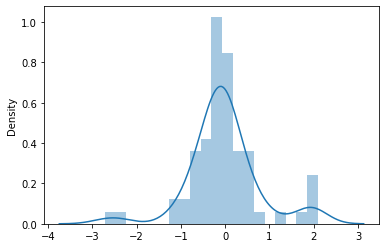

In [ ]:
import seaborn as sns
sns.distplot(y_test- rfreg_test_prediction.reshape(-1 , 1))

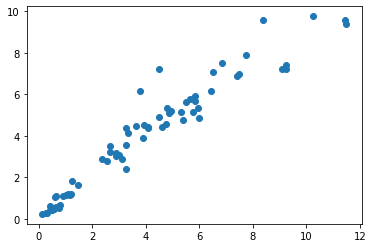

In [ ]:
plt.scatter(y_test , rfreg_test_prediction)

<h4>Saving The Model</h4>

In [ ]:
# import pickle
# file = open("car-price-prediction-model.pkl" , "wb")
# pickle.dump(rf_reg , file)